### Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

### Load the Iris dataset

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Standardize the data

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Áp dụng K-Means

In [4]:

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Gán nhãn cụm vào dataframe
df['cluster'] = labels


### Trực quan hóa kết quả

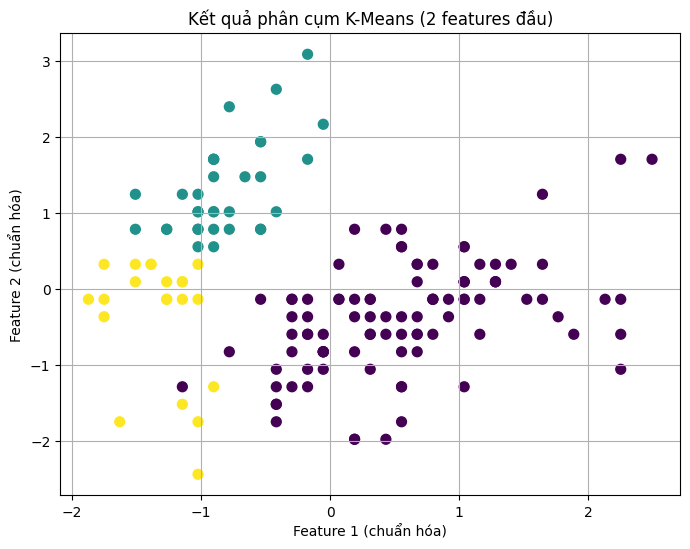

In [5]:

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Kết quả phân cụm K-Means (2 features đầu)")
plt.xlabel("Feature 1 (chuẩn hóa)")
plt.ylabel("Feature 2 (chuẩn hóa)")
plt.grid(True)
plt.show()


### Đánh giá cụm bằng Silhouette Score

In [6]:

score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {score:.3f}")


Silhouette Score: 0.480


### 🔸 Phần mở rộng – Tìm số cụm K tối ưu bằng Elbow Method

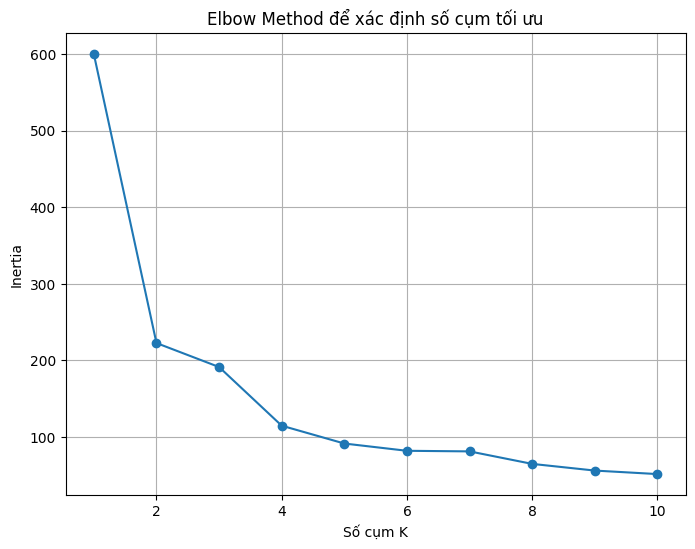

In [7]:

inertia = [] # inertia_ là tổng khoảng cách bình phương từ mỗi điểm đến tâm cụm gần nhất (tổng phương sai nội cụm – Within-Cluster Sum of Squares).
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method để xác định số cụm tối ưu")
plt.xlabel("Số cụm K")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()



- Trục hoành (X): Số cụm K
- Trục tung (Y): Inertia (tổng sai số trong cụm)
* Ý nghĩa của biểu đồ:
Khi K = 1, inertia rất lớn (tất cả điểm trong một cụm duy nhất).
Khi tăng K, inertia giảm mạnh nhưng sau một điểm nào đó, giảm chậm lại.
Điểm mà đường cong bắt đầu “gập” xuống tạo thành “khuỷu tay” gọi là elbow point → đó là K tối ưu.
-> Trong hình trên, elbow point nằm khoảng K = 3, tức là chia dữ liệu thành 3 cụm là hợp lý nhất.